In [ ]:
import csv
import pickle
import datetime

In [ ]:
from statsmodels.compat.pandas import sort_values
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf


In [3]:
#%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [4]:
data = pd.read_csv('data/data.csv')
data=data.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
new_order =  ['date', 'units', 'item_nbr', 'store_nbr','station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC' ]

In [27]:
data = data[new_order]

In [8]:
data.units = data.units.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,:-1], data.units
X_train, X_testm, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir' ])
    df['date'] = pd.to_datetime(df['date'])
    df["week_day_name"] = df['date'].dt.weekday_name
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()


In [ ]:
def itemdf(df, nbr):
    item_nbr = df[df.item_nbr == nbr]
    for idx in range(5, 8):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    
    for idx in range(16, 23):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    add_depart1(item_nbr)
    
    return item_nbr
    

In [ ]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

#예시

# data = type_change_numeric(data,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
#        'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
#        'avgspeed', 'resultspeed', 'resultdir' ])

In [ ]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [ ]:
train = pd.concat([X_train, y_train] ,axis = 1)

In [ ]:
train.head()

In [ ]:
train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [ ]:
### 시계열 보기

In [ ]:
data = fulldf(data)

In [35]:
data37 = data[data.item_nbr == 37]
data37 = data37[data37.store_nbr == 10]

In [75]:
data37.reset_index(inplace = True)

In [79]:
data_t = data37.iloc[:730, :]

In [90]:
data_f = data37.iloc[730:, :]

In [86]:
1033-730

303

In [85]:
data37.tail()

,index,date,units,item_nbr,store_nbr,station_nbr,tmax,tmin,tavg,depart,...,HZ,FU,DU,SQ,FZ,MI,PR,BC,BL,VC
1029,79511,2014-10-27,13,37,10,12,87,57,72,M,...,False,False,False,False,False,False,False,False,False,False
1030,79534,2014-10-28,8,37,10,12,84,57,71,M,...,False,False,False,False,False,False,False,False,False,False
1031,79557,2014-10-29,12,37,10,12,85,60,73,M,...,False,False,False,False,False,False,False,False,False,False
1032,79580,2014-10-30,14,37,10,12,81,61,71,M,...,False,False,False,False,False,False,False,False,False,False
1033,79603,2014-10-31,13,37,10,12,75,60,68,M,...,False,False,False,False,False,False,False,False,False,False


In [80]:
p = data_t.pivot(index = "date", columns = "store_nbr", values = "units").astype(float)

In [81]:
p.values.astype(float)

array([[32.],
       [33.],
       [26.],
       [25.],
       [26.],
       [40.],
       [46.],
       [42.],
       [31.],
       [24.],
       [11.],
       [19.],
       [13.],
       [18.],
       [25.],
       [26.],
       [11.],
       [11.],
       [18.],
       [14.],
       [10.],
       [26.],
       [13.],
       [14.],
       [21.],
       [ 4.],
       [14.],
       [17.],
       [13.],
       [ 8.],
       [16.],
       [18.],
       [23.],
       [ 9.],
       [16.],
       [30.],
       [13.],
       [ 9.],
       [16.],
       [13.],
       [18.],
       [22.],
       [37.],
       [12.],
       [ 7.],
       [ 8.],
       [14.],
       [10.],
       [22.],
       [18.],
       [16.],
       [18.],
       [ 8.],
       [11.],
       [12.],
       [13.],
       [15.],
       [15.],
       [ 9.],
       [10.],
       [16.],
       [12.],
       [22.],
       [31.],
       [17.],
       [12.],
       [12.],
       [14.],
       [ 1.],
       [16.],
       [17.],
      

<IPython.core.display.Javascript object>


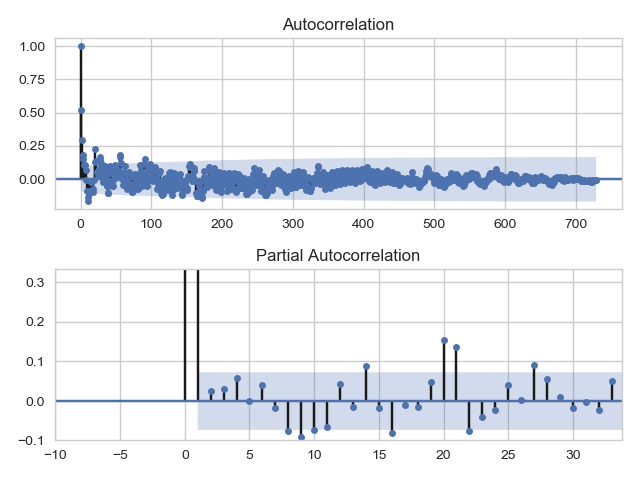

In [82]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(p, ax=ax1)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(p, ax=ax2)
plt.tight_layout()
plt.show()

In [84]:
m = sm.tsa.ARMA(p, (2, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                     10   No. Observations:                  730
Model:                     ARMA(2, 1)   Log Likelihood               -2513.733
Method:                       css-mle   S.D. of innovations              7.571
Date:                Wed, 04 Jul 2018   AIC                           5037.465
Time:                        22:57:15   BIC                           5060.431
Sample:                    01-01-2012   HQIC                          5046.326
                         - 12-31-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4799      0.658     23.525      0.000      14.190      16.770
ar.L1.10       1.0897      0.221      4.926      0.000       0.656       1.523
ar.L2.10      -0.2654      0.126     -2.105      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [92]:
fore = r.forecast(304)[0]

In [93]:
delta = fore - data_f.units

In [95]:
delta

730      7.137781
731     10.498260
732     12.265639
733     13.299593
734     13.957181
735     -0.600688
736     -4.293443
737      3.924006
738     -0.920593
739      1.191029
740     15.271415
741     15.329384
742     15.371215
743     15.401411
744     15.423213
745     15.438955
746     15.450322
747     -6.541469
748      0.464458
749     -6.531262
750      6.471829
751      2.474061
752      3.475673
753     -0.523163
754      2.477678
755     -4.521715
756     -0.521277
757      4.479040
758      1.479268
759     11.479433
          ...    
1004    15.479862
1005    -2.520138
1006    -9.520138
1007    -0.520138
1008    -5.520138
1009    -1.520138
1010     1.479862
1011     3.479862
1012     4.479862
1013     1.479862
1014   -16.520138
1015    -0.520138
1016     5.479862
1017    -0.520138
1018     7.479862
1019     4.479862
1020     0.479862
1021    -2.520138
1022     6.479862
1023    11.479862
1024     1.479862
1025     6.479862
1026     5.479862
1027    -2.520138
1028    -2

In [ ]:
item37 = df[df.item_nbr == 37]


In [ ]:
data[data.item_nbr == 46].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))

In [ ]:
data[data.item_nbr == 47].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))

In [ ]:
data[data.item_nbr == 1].pivot(index = "date", columns = "store_nbr", values = "units").plot(figsize=(16,4))

plt.show()

In [ ]:
item37 = item37.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [ ]:
item37.tmax.fillna(item37.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True) 

In [ ]:
item37 = item37[item37.tmax.isnull() == False]
item37 = item37[item37.tmin.isnull() == False]
item37 = item37[item37.dewpoint.isnull() == False]
item37 = item37[item37.wetbulb.isnull() == False]
item37 = item37[item37.preciptotal.isnull() == False]

In [ ]:
item37.isnull().any()

In [ ]:
data.snowfall = data.snowfall.replace(["T","  T"],0.05)
data.preciptotal = data.preciptotal.replace(["T","  T"],0.005)
data.depart = pd.to_numeric(data.depart, errors='coerce')



In [ ]:
data['date'] = pd.to_datetime(data['date'])
#data['sunrise'] = pd.to_datetime(data['sunrise'], format='%H%M' , errors='coerce')
#data['sunset'] = pd.to_datetime(data['sunset'], format='%H%M' , errors='coerce')
#X_testm['date'] = pd.to_datetime(X_testm['date'] , errors='coerce')
#X_testm['sunrise'] = pd.to_datetime(X_testm['sunrise'], format='%H%M' , errors='coerce')
#X_testm['sunset'] = pd.to_datetime(X_testm['sunset'], format='%H%M' , errors='coerce')

In [ ]:
data["week_day_name"] = data.date.dt.weekday_name
data["day_of_year"] = data.date.dt.dayofyear
data["year"] = data.date.dt.year

In [ ]:
#data.tmax.fillna(data.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True)
data = data.replace(["M",None], '')

In [ ]:
for idx in range(5, 8):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [ ]:
for idx in range(16, 23):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [ ]:
item37['weekend'] = False
item37.weekend[item37['week_day_name'] == 'Sunday'] = True
item37.weekend[item37['week_day_name'] == 'Saturday'] = True
item37.weekend[item37['week_day_name'] == 'Friday'] = True

In [ ]:
item37['reldate'] = 0
item37.reldate[ item37.date.dt.year == 2012] = item37.date.dt.dayofyear
item37.reldate[ item37.date.dt.year != 2012] = item37.date.dt.dayofyear + (item37.date.dt.year- 2012)*365 + 1

In [ ]:
item37.isnull().any()

In [ ]:
item37_df.head()

In [ ]:
item37.columns

In [ ]:
item37.columns =['date', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed',
       'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS',
       'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ', 'MI', 'PR',
       'BC', 'BL', 'VC', 'units', 'week_day_name', 'day_of_year', 'year',
       'weekend']

#### OLS

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + tmax + tmin + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)
#model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result1 = model.fit()


In [ ]:
item37['logunits'] = item37.units.apply(lambda X: np.log(X) + 1)

In [ ]:
item37.head()

In [ ]:
print(result1.summary())

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = item37)
model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result1 = model.fit()
print(result1.summary())

In [96]:
pickle.dump( item37, open( "item37.p", "wb" ) )

NameError: name 'item37' is not defined

In [ ]:
log_model = sm.OLS.from_formula("logunits ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = item37)
#model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

log_result1 = log_model.fit()
print(log_result1.summary())

In [ ]:
model2 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed) + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)


result2 = model2.fit()
print(result2.summary())